In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dataset/titanic.csv')

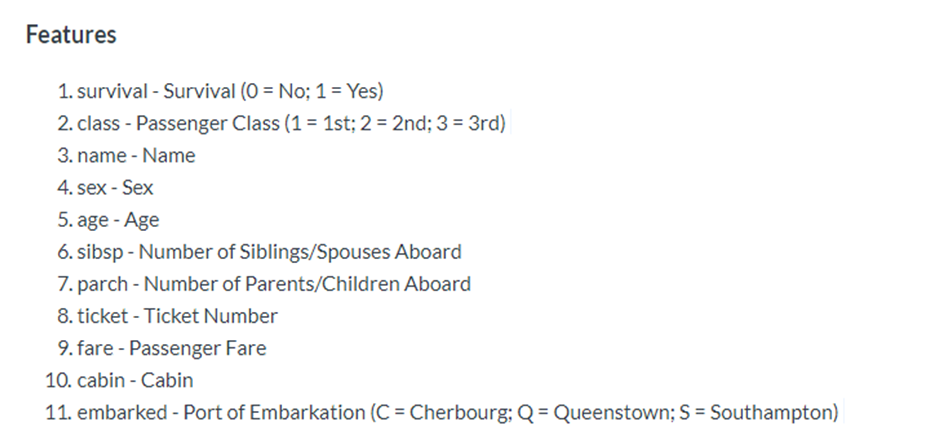

In [ ]:
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S


In [ ]:
df.shape

(1310, 11)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1310 entries, 0 to 1309
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    1309 non-null   float64
 1   survived  1309 non-null   float64
 2   name      1309 non-null   object 
 3   sex       1309 non-null   object 
 4   age       1046 non-null   float64
 5   sibsp     1309 non-null   float64
 6   parch     1309 non-null   float64
 7   ticket    1309 non-null   object 
 8   fare      1308 non-null   float64
 9   cabin     295 non-null    object 
 10  embarked  1307 non-null   object 
dtypes: float64(6), object(5)
memory usage: 112.7+ KB


In [ ]:
df.isnull().sum()

pclass         1
survived       1
name           1
sex            1
age          264
sibsp          1
parch          1
ticket         1
fare           2
cabin       1015
embarked       3
dtype: int64

In [ ]:
# Since cabin column has more that 75% missing , so dropping the cabin column
df.drop(columns=['cabin'],axis=1,inplace=True)

In [ ]:
df.columns

Index(['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'embarked'],
      dtype='object')

In [ ]:
# Age column also have missing value. So we will try to replace the missing values with mean age
df['age'].fillna(df['age'].mean(), inplace=True)

In [ ]:
df['embarked'].unique()

array(['S', 'C', nan, 'Q'], dtype=object)

In [ ]:
df['embarked'].value_counts()

S    914
C    270
Q    123
Name: embarked, dtype: int64

In [ ]:
# Replacing the 3 missing value in embarked by the S
df['embarked'].fillna('S',inplace=True) 

In [ ]:
df['parch'].value_counts()

0.0    1002
1.0     170
2.0     113
3.0       8
4.0       6
5.0       6
6.0       2
9.0       2
Name: parch, dtype: int64

In [ ]:
df['sibsp'].value_counts()

0.0    891
1.0    319
2.0     42
4.0     22
3.0     20
8.0      9
5.0      6
Name: sibsp, dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1310 entries, 0 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    1309 non-null   float64
 1   survived  1309 non-null   float64
 2   name      1309 non-null   object 
 3   sex       1309 non-null   object 
 4   age       1310 non-null   float64
 5   sibsp     1309 non-null   float64
 6   parch     1309 non-null   float64
 7   ticket    1309 non-null   object 
 8   fare      1308 non-null   float64
 9   embarked  1310 non-null   object 
dtypes: float64(6), object(4)
memory usage: 102.5+ KB


In [ ]:
# Changing the dtype of following features
# survived (category) , pclass (category) , age (int) , sex (category)
#b/c we only have 3 value in embarked so changing it to category

In [ ]:
df['survived']=df['survived'].astype('category')

In [ ]:
df['pclass']=df['pclass'].astype('category')

In [ ]:
df['age']=df['age'].astype('int')

In [ ]:
df['sex']=df['sex'].astype('category')

In [ ]:
df['embarked']=df['embarked'].astype('category')

In [ ]:
df.describe()

,age,sibsp,parch,fare
count,1310.000000,1309.000000,1309.000000,1308.000000
mean,29.684733,0.498854,0.385027,33.295479
std,12.894909,1.041658,0.865560,51.758668
min,0.000000,0.000000,0.000000,0.000000
25%,22.000000,0.000000,0.000000,7.895800
50%,29.000000,0.000000,0.000000,14.454200
75%,35.000000,1.000000,0.000000,31.275000
max,80.000000,8.000000,9.000000,512.329200


# Univariate Analysis

In [ ]:
# We have completed the preprocessing part.
# Now we will do a univariate analysis  ( Target column- Survived)

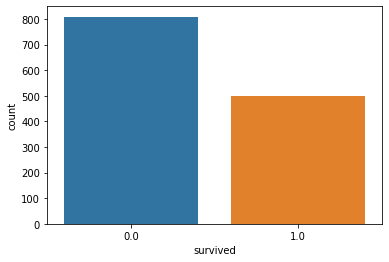

In [ ]:
sns.countplot(x='survived',data=df)
# Conclusion-- majority (alomst 60%)  of people died in the accident 

In [ ]:
df['survived'].value_counts()

0.0    809
1.0    500
Name: survived, dtype: int64

In [ ]:
df.shape

(1310, 10)

3.0    54.122137
1.0    24.656489
2.0    21.145038
Name: pclass, dtype: float64


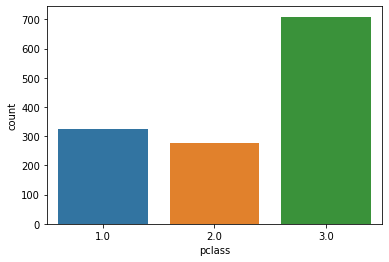

In [ ]:
sns.countplot(x='pclass',data=df)
print((df['pclass'].value_counts()/1310)*100)  # Here we've calculated the pclass distribution by percentage
# Conclusion-- majority of people travel in pclass 3 which is almost 55% 

male      64.351145
female    35.572519
Name: sex, dtype: float64


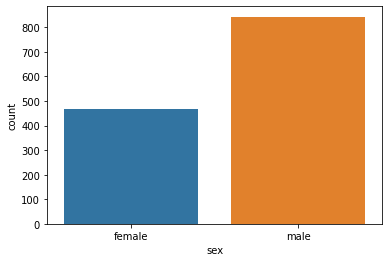

In [ ]:
sns.countplot(x='sex',data=df)
print((df['sex'].value_counts()/1310)*100)  # passanger percentage wise distribution
# Conclusion-- Majority of passengers were male almost 65%

0.0    68.015267
1.0    24.351145
2.0     3.206107
4.0     1.679389
3.0     1.526718
8.0     0.687023
5.0     0.458015
Name: sibsp, dtype: float64


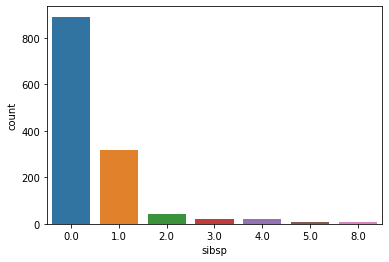

In [ ]:
sns.countplot(x='sibsp',data=df)
print((df['sibsp'].value_counts()/1310)*100)
# Conclusion-- Majority people travel alone without siblings/spouse, almost 68%

0.0    76.488550
1.0    12.977099
2.0     8.625954
3.0     0.610687
4.0     0.458015
5.0     0.458015
6.0     0.152672
9.0     0.152672
Name: parch, dtype: float64


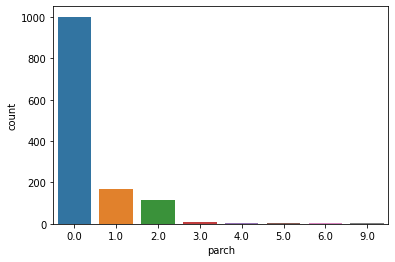

In [ ]:
sns.countplot(x='parch',data=df)
print((df['parch'].value_counts()/1310)*100)
# Conclusion-- majority of poeple travle alone without any parents/children, almost 76%. And 13% people travel with only 1 family person

S    70.000000
C    20.610687
Q     9.389313
Name: embarked, dtype: float64


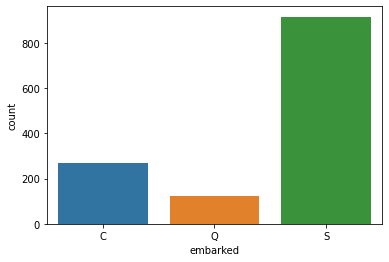

In [ ]:
sns.countplot(x='embarked',data=df)
print((df['embarked'].value_counts()/1310)*100)
#Conclusion-- majority of poeple travel to S

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


0.48937747903142664
0.9671589091406809


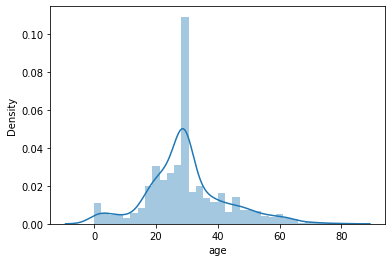

In [ ]:
sns.distplot(df['age'])
print(df['age'].skew())  # degree of symmetry
print(df['age'].kurt())  # degree of peakedness
# #Conclusion-- Majority of people have age range from 20- 40

In [ ]:
print(df['age'].skew())

0.48937747903142664


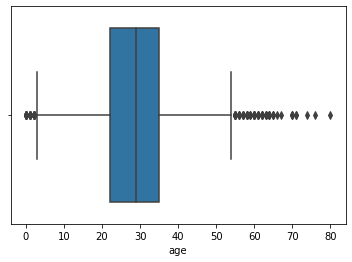

In [ ]:
sns.boxplot(x='age',data=df)

In [ ]:
# From the above boxplot, let's analyse how many people are in the outlier age range
a=df[(df['age']>60) & ( df['age']<70)].shape[0]
b=df[(df['age']>=70) & ( df['age']<75)].shape[0]
c=df[(df['age']>=75)].shape[0]
print('No of people in age range 60-70 is={} , 70-75 is={} and above 75 is={}'.format(a,b,c))

No of people in age range 60-70 is=24 , 70-75 is=6 and above 75 is=2


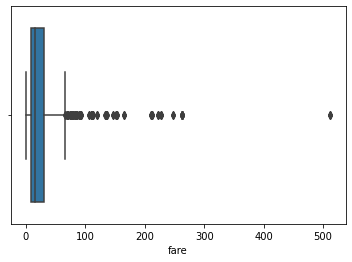

In [ ]:
sns.boxplot(x='fare',data=df)

In [ ]:
p=df[(df['fare']>100) & (df['fare']<200)].shape[0]
l=df[(df['fare']>=200) & (df['fare']<300)].shape[0]
print('people with fare in between 100-200 is {}, and fare between 200-300 is {}'.format(p,l))

# Conclusion- A lot of people ave cheaper ticket

people with fare in between 100-200 is 46, and fare between 200-300 is 34


# Multivaite Analysis

In [ ]:
df.columns


Index(['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'embarked'],
      dtype='object')

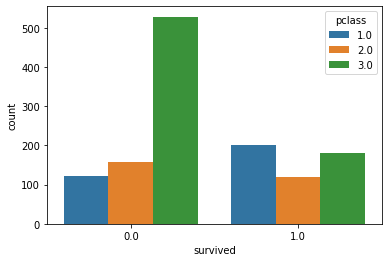

In [ ]:
# Survival with pclass

sns.countplot(x='survived',hue='pclass',data=df)

# Conclusion- Pclass 3 is more dangerous and have higher chances of dying. Pclass 3 is highly risky.

In [ ]:
pd.crosstab(df['pclass'],df['survived'])

survived,0.0,1.0
pclass,,
1.0,123,200
2.0,158,119
3.0,528,181


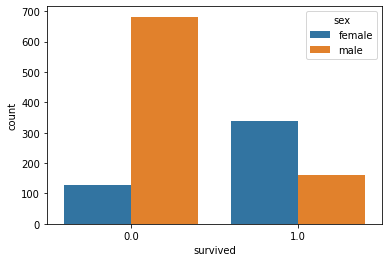

In [ ]:
# # Survival with sex

sns.countplot(x='survived',hue='sex',data=df)

# Conclusion- male have higher chances of dying as compared to female.

In [ ]:
pd.crosstab(df['sex'],df['survived'])

survived,0.0,1.0
sex,,
female,127,339
male,682,161


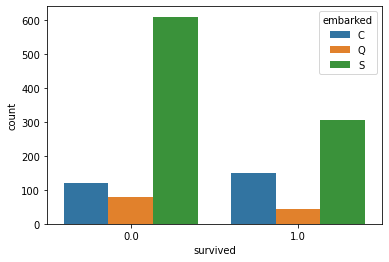

In [ ]:
# Survival with embarked

sns.countplot(x='survived',hue='embarked',data=df)

# Conclusion- People travelling to S have higher chances of dying.. city S is highly risky.

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


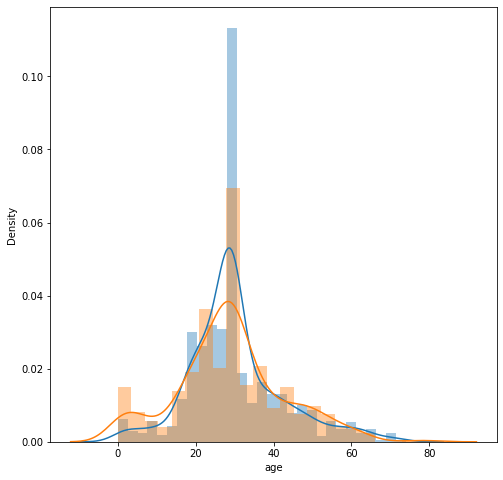

In [ ]:
# Survival with age

plt.figure(figsize=(8,8))
sns.distplot(df[df['survived']==0]['age'])
sns.distplot(df[df['survived']==1]['age'])

# Conslusion- People with age range from 15-40 have higher chance of dying.

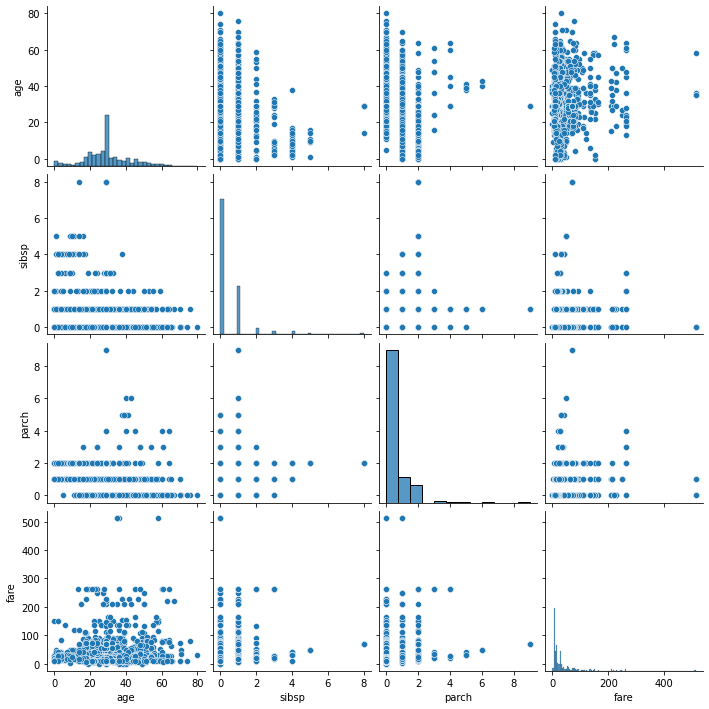

In [ ]:
sns.pairplot(df)

In [ ]:
df.corr()

,age,sibsp,parch,fare
age,1.000000,-0.190345,-0.128821,0.175485
sibsp,-0.190345,1.000000,0.373587,0.160238
parch,-0.128821,0.373587,1.000000,0.221539
fare,0.175485,0.160238,0.221539,1.000000


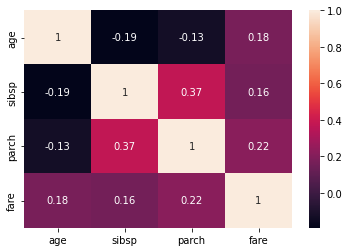

In [ ]:
sns.heatmap(df.corr(),annot=True)

# Conclusion- sibsp & parch have high correrelaion

Feature engineering

In [ ]:
# We have created a new column  by the name  of family  which will  be the sum of  sibsp and parch

df['family_size']=df['sibsp']+df['parch']

In [ ]:
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked,family_size
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29,0.0,0.0,24160,211.3375,S,0.0
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0,1.0,2.0,113781,151.5500,S,3.0
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2,1.0,2.0,113781,151.5500,S,3.0
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30,1.0,2.0,113781,151.5500,S,3.0
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25,1.0,2.0,113781,151.5500,S,3.0


In [ ]:
# now dropping sibsp and parch column

df.drop( columns=['sibsp','parch'],axis=1, inplace= True)

In [ ]:
df.head()

,pclass,survived,name,sex,age,ticket,fare,embarked,family_size
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29,24160,211.3375,S,0.0
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0,113781,151.5500,S,3.0
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2,113781,151.5500,S,3.0
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30,113781,151.5500,S,3.0
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25,113781,151.5500,S,3.0


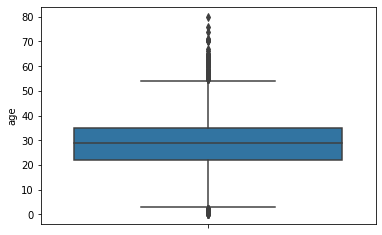

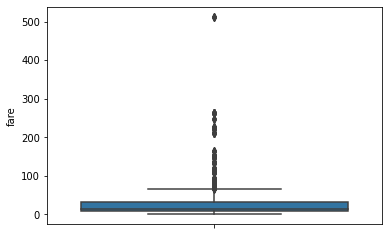

In [ ]:
col=['age','fare']
for c in col:
  plt.figure()  
  sns.boxplot(y=c,data=df)

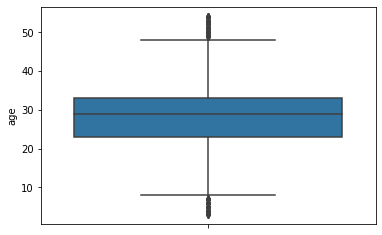

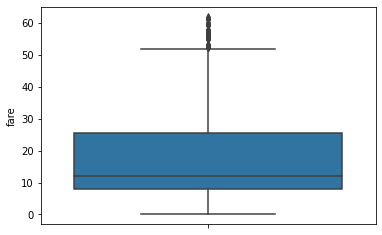

In [ ]:
col=['age','fare']
for c in col:
  percentile25=df[c].quantile(0.25)
  percentile75=df[c].quantile(0.75)
  iqr=percentile75-percentile25
  upper_limit=percentile75+ (1.5*iqr)
  lower_limit=percentile25 - (1.5*iqr)
  df=df[(df[c]<upper_limit) & (df[c]>lower_limit)]
  plt.figure()
  sns.boxplot(y=c,data=df)

In [ ]:
df.shape

(1055, 9)

One hot encoding

In [ ]:
pd.get_dummies(data=df, columns=['pclass','sex','embarked'], drop_first=True)

,survived,name,age,ticket,fare,family_size,pclass_2.0,pclass_3.0,sex_male,embarked_Q,embarked_S
5,1.0,"Anderson, Mr. Harry",48,19952,26.5500,0.0,0,0,1,0,1
7,0.0,"Andrews, Mr. Thomas Jr",39,112050,0.0000,0.0,0,0,1,0,1
8,1.0,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",53,11769,51.4792,2.0,0,0,0,0,1
15,0.0,"Baumann, Mr. John D",29,PC 17318,25.9250,0.0,0,0,1,0,1
20,1.0,"Beckwith, Mr. Richard Leonard",37,11751,52.5542,2.0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...
1304,0.0,"Zabour, Miss. Hileni",14,2665,14.4542,1.0,0,1,0,0,0
1305,0.0,"Zabour, Miss. Thamine",29,2665,14.4542,1.0,0,1,0,0,0
1306,0.0,"Zakarian, Mr. Mapriededer",26,2656,7.2250,0.0,0,1,1,0,0
1307,0.0,"Zakarian, Mr. Ortin",27,2670,7.2250,0.0,0,1,1,0,0


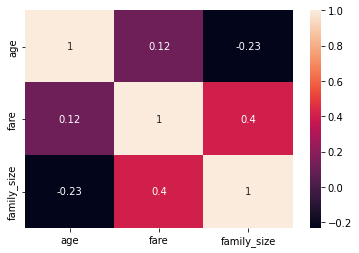

In [ ]:
sns.heatmap(df.corr(),annot=True)